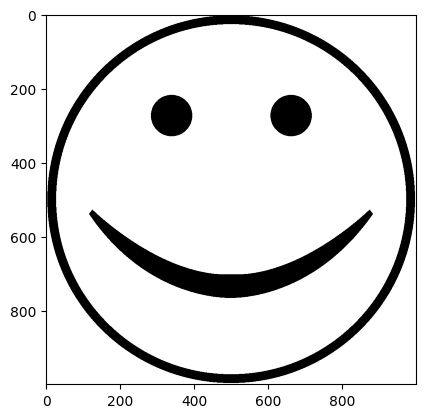

In [396]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import numpy as np

FileName = "Smiley"
img = mpimg.imread(('images/' + FileName + '.png'))

plt.imshow(img)

In [397]:
height = len(img)
width = len(img[0])

print("Height: ", height)
print("Width: ", width) 

Height:  1000
Width:  1000


(1000, 1000)


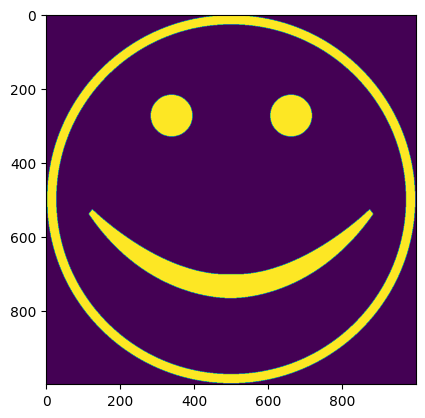

In [398]:
FlattenedColorData = np.zeros([height, width])

for i in range(height):
    for j in range(width):
        FlattenedColorData[i][j] = (3 - (img[i][j][0] + img[i][j][1] + img[i][j][2] ))
        
print(np.shape(FlattenedColorData))
plt.imshow(FlattenedColorData)

0.0


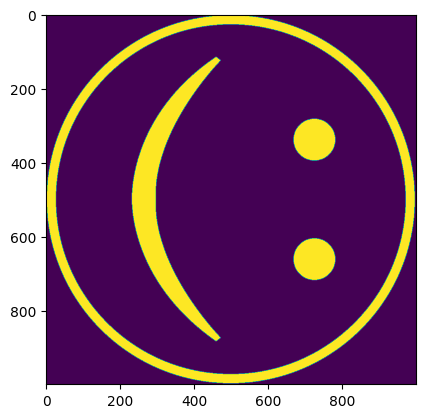

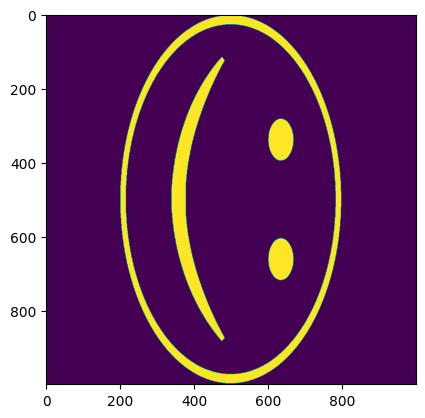

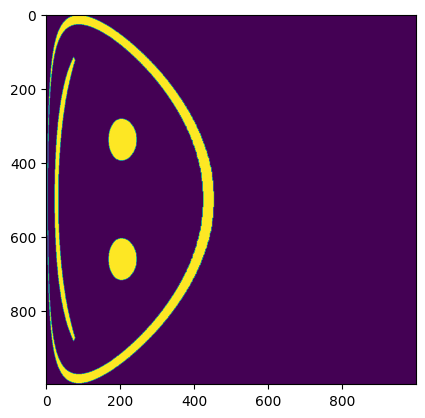

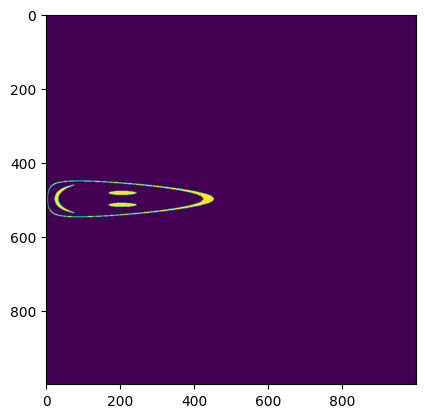

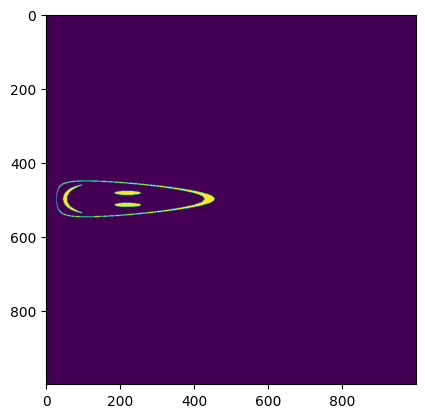

In [399]:
FlattenedColorDataT = np.fliplr(FlattenedColorData.transpose())
print(FlattenedColorData[0][0])

WarpedData = np.zeros([width, height])
WarpedData2 = np.zeros([width, height])
WarpedData3 = np.zeros([width, height])
WarpedData4 = np.zeros([width, height])

midpointH = height / 2
midpointW = width / 2

percentWidthReduction = 0.9
percentHeightReduction = 0.4

for i in range(width):
    for j in range(height):   
        WarpedData[i][int(j - ( (((percentHeightReduction / 2) * height) * (j - midpointH)) / midpointH))] = FlattenedColorDataT[i][j] 

for i in range(len(WarpedData)):
    for j in range(len(WarpedData[i])):
        selectionIndex = int((((j) / height)**(1/3.5) * height))
        if(selectionIndex < len(WarpedData[i]) - 1):
            WarpedData2[i][j] = WarpedData[i][selectionIndex]
        else:
            WarpedData2[i][j] = 0; 
        
for i in range(len(WarpedData2)):
    WarpedData3[int(i - ( (((percentWidthReduction / 2) * width) * (i - midpointW)) / midpointW))] = WarpedData2[i]

for i in range(len(WarpedData3)):
    for j in range(len(WarpedData3[i])):   
        WarpedData4[i][int(j - ( (((0.05 / 2) * height) * (j - midpointH)) / midpointH))] = WarpedData3[i][j] 
        
        
plt.imshow(FlattenedColorDataT)
plt.show()
plt.imshow(WarpedData)
plt.show()
plt.imshow(WarpedData2)
plt.show()
plt.imshow(WarpedData3)
plt.show()
plt.imshow(WarpedData4)
plt.show()

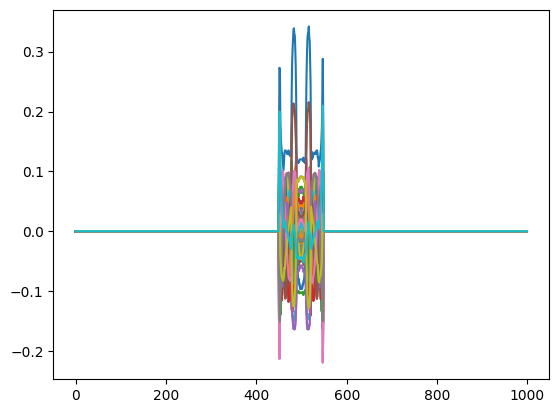

In [400]:
t = np.arange(width)
s = np.fft.ifft(WarpedData4, width)
plt.plot(t, s.real, label='real')

totalOutput = np.empty(0)

for row in WarpedData4:
    totalOutput = np.concatenate((totalOutput, np.fft.ifft(row, 10000))).real

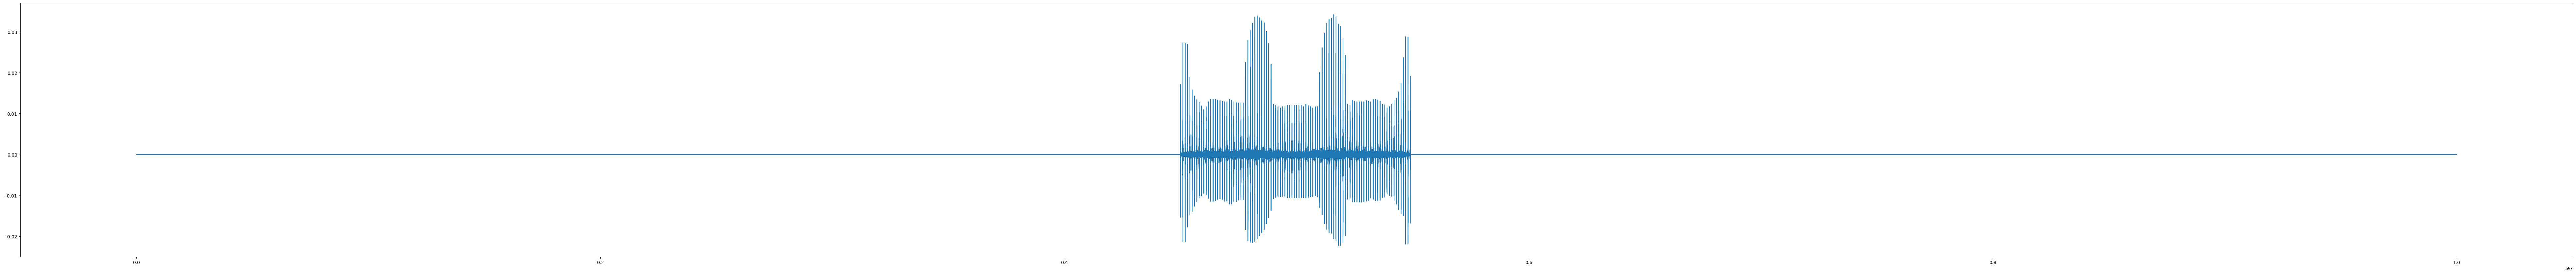

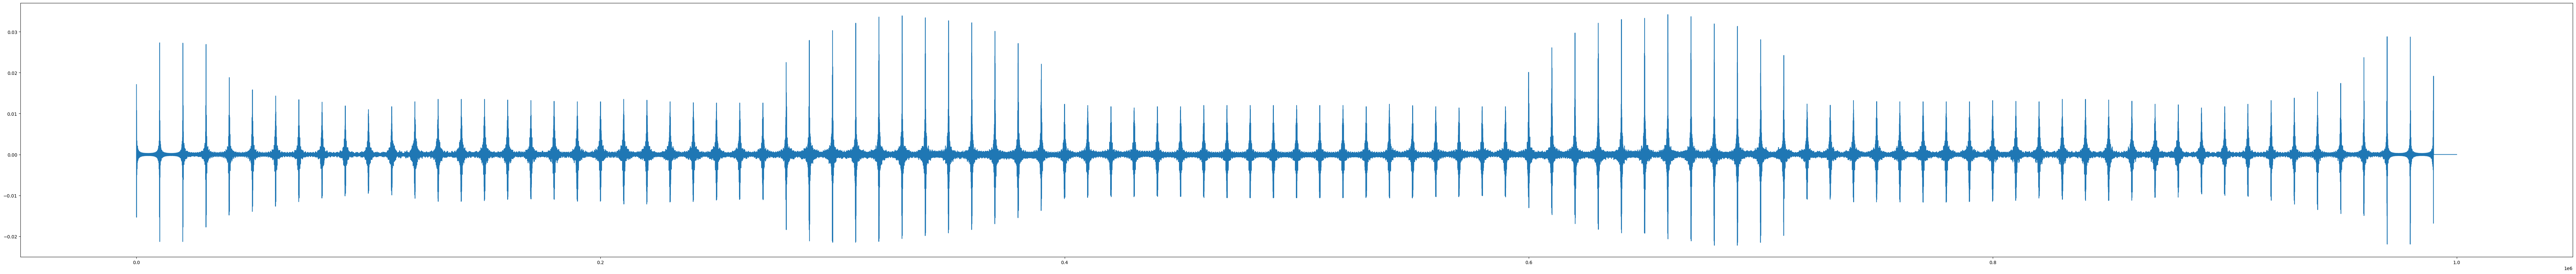

In [401]:

plt.figure(figsize=(100,10))
plt.plot(totalOutput)
plt.show()
plt.figure(figsize=(100,10))
plt.plot(totalOutput[int(percentWidthReduction * width * 0.5 * 10000): int((width * 10000) - percentWidthReduction * width * 0.5 * 10000)])
plt.show()

totalOutputCut = totalOutput[int(percentWidthReduction * width  * 0.5 * 10000): int((width * 10000) - percentWidthReduction * width * 0.5 * 10000)]

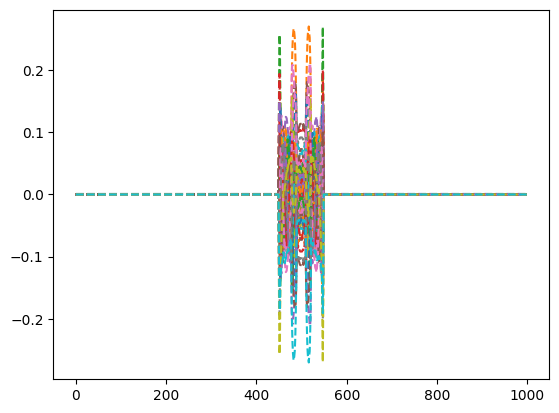

In [402]:
plt.plot(t, s.imag, '--', label='imaginary')


In [403]:
np.shape(s)

(1000, 1000)

In [404]:
samplerate = 384000; fs = 100

t = np.linspace(0., 1., samplerate)

wf.write(FileName + ".wav", samplerate, totalOutputCut.astype(np.float32))